In [4]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Long  Only Portfolio With Only ETFs

In [5]:
SPY = ETF("SPY")
XLB = ETF("XLB")
XLF = ETF("XLF")
XLP = ETF("XLP")
XLY = ETF("XLY")
XLE = ETF("XLE")
XLI = ETF("XLI")
XLK = ETF("XLK")
XLU = ETF("XLU")
XLV = ETF("XLV")

all_etfs = [XLB, XLF, XLP, XLY, XLE, XLI, XLK, XLU, XLV]


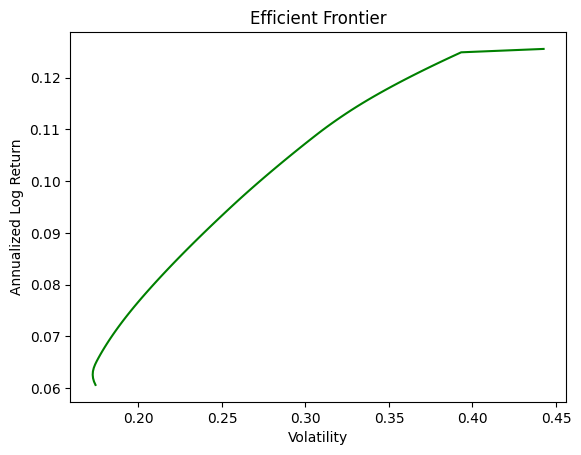

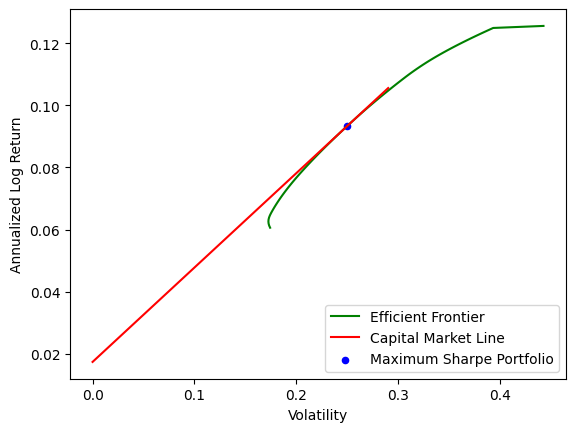

In [6]:
portfolio = Portfolio(all_etfs, rf = get_risk_free_rate('2008-05-06'), equity_benchmark = SPY)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.plot_ef(n_points = 100, min_weight=0, max_weight=1.0)


In [7]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [0.07305854 0.08061408 0.0344594  0.04785691 0.06171684 0.07075352
 0.33343958 0.10125466 0.19684648]
MSR portfolio expected annualized log return: 0.09340470596914384
MSR portfolio annualized volatility of log returns: 0.2501659937585381
Sharpe Ratio of Portfolio: 0.30362956700956767
MSR portfolio VaR: 0.41148644217365077
MSR portfolio ES: 0.5160205993285593



In [8]:
# Filters data to only 2024 election cycle
portfolio.filter(startDate="2024-01-01", endDate="2025-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2024-05-07'))
# See how the calculated weights using data up to and including 2020 election would have worked
# for the 2024 election
print("2024 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2023 (6.5 month period of a non-election year)
portfolio.filter(startDate="2023-05-05", endDate="2023-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2023-05-05'))
print("2023 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 6 to November 18 of 2022 (6.5 month period of a non-election year)
portfolio.filter(startDate="2022-05-06", endDate="2022-11-18", period=-1)
portfolio.set_rf(get_risk_free_rate('2022-05-06'))
print("2022 May 6 to November 18 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 7 to November 19 of 2021 (6.5 month period of a non-election year)
portfolio.filter(startDate="2021-05-07", endDate="2021-11-19", period=-1)
portfolio.set_rf(get_risk_free_rate('2021-05-07'))
print("2021 May 7 to November 19 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

2024 election period actual annualized log returns: 0.18462133366713046
2023 May 5 to November 17 actual annualized log returns: 0.16169406620253343
2022 May 6 to November 18 actual annualized log returns: -0.023118945536928313
2021 May 7 to November 19 actual annualized log returns: 0.2089290799176716
